<a href="https://colab.research.google.com/github/Mrigakshi24-ux/Training-Sheet/blob/main/Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import mnist
from keras.layers import Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras import Input, Model, Sequential
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# working on the mnist dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
# normalization
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [ ]:
# 3D to 2D
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
x_train.shape, x_test.shape

((60000, 784), (10000, 784))

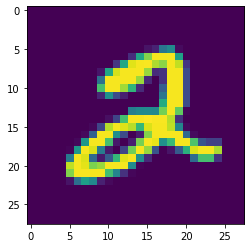

In [ ]:
# random sample
plt.imshow(x_train[5].reshape(28,28))

In [ ]:
# the lesser the dimension of the latent space representation, more the compression

# images of size 28*28
input_size = 784

# hidden layer
hidden_size = 128

# latent space representation
code_size = 32

# encoder 
input_img = Input(shape = (input_size, ))
hidden_1 = Dense(hidden_size, activation = 'relu')(input_img)
code_layer = Dense(code_size, activation = 'relu')(hidden_1)

# decoder
hidden_2 = Dense(hidden_size, activation = 'relu')(code_layer)
output_img = Dense(input_size, activation = 'sigmoid')(hidden_2)

In [ ]:
# Model
autoencoder = Model(input_img, output_img)

In [ ]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
# Here x and y are same because input and output should be same
autoencoder.fit(x_train, x_train, epochs=20, batch_size=256, validation_data=(x_test, x_test))

Epoch 1/20
235/235 [==============================] - 5s 18ms/step - loss: 0.2331 - val_loss: 0.1541
Epoch 2/20
235/235 [==============================] - 4s 17ms/step - loss: 0.1367 - val_loss: 0.1220
Epoch 3/20
235/235 [==============================] - 4s 17ms/step - loss: 0.1171 - val_loss: 0.1104
Epoch 4/20
235/235 [==============================] - 4s 17ms/step - loss: 0.1083 - val_loss: 0.1040
Epoch 5/20
235/235 [==============================] - 4s 17ms/step - loss: 0.1036 - val_loss: 0.1002
Epoch 6/20
235/235 [==============================] - 4s 17ms/step - loss: 0.1003 - val_loss: 0.0978
Epoch 7/20
235/235 [==============================] - 4s 17ms/step - loss: 0.0979 - val_loss: 0.0960
Epoch 8/20
235/235 [==============================] - 4s 17ms/step - loss: 0.0960 - val_loss: 0.0941
Epoch 9/20
235/235 [==============================] - 4s 17ms/step - loss: 0.0945 - val_loss: 0.0927
Epoch 10/20
235/235 [==============================] - 4s 17ms/step - loss: 0.0935 - val_lo

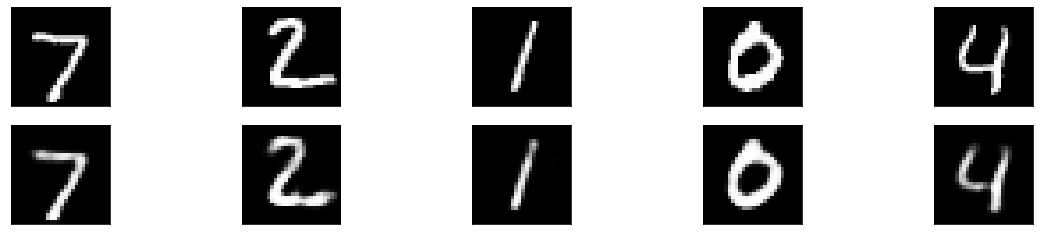

In [ ]:
# predicting on test data
new_output_img = autoencoder.predict(x_test)

plt.figure(figsize=(20, 4))

for i in range(5):

    # Display original
    ax = plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()

    # to disolve the ticks on both the axis
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, 5, i + 1 + 5)
    plt.imshow(new_output_img[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

#Adding Noise and Using Autoencoders

In [ ]:
noise_factor = 0.4
x_train_noisy = x_train + noise_factor * np.random.normal(0, 1, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(0, 1, size=x_test.shape)

# to reshape the train and test into 3D
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

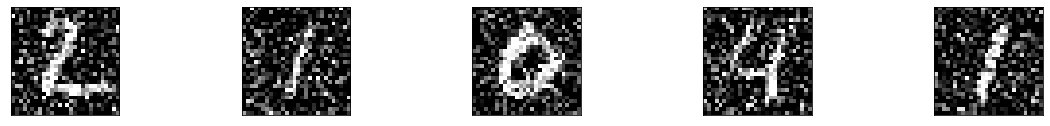

In [ ]:
plt.figure(figsize=(20, 2))

for i in range(1, 5 + 1):
    ax = plt.subplot(1, 5, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))    
    plt.gray()

    # settings the markings on axis to false
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

In [ ]:
# reshaping the input for CNN
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [ ]:
model = Sequential()
# encoder
model.add(Conv2D(35, 3, activation= 'relu', padding='same', input_shape = (28,28,1)))
# padding = same so that output has same size as output
model.add(MaxPooling2D(2, padding= 'same'))
model.add(Conv2D(25, 3, activation= 'relu', padding='same'))
model.add(MaxPooling2D(2, padding= 'same'))

# decoder
model.add(Conv2D(25, 3, activation= 'relu', padding='same'))
# upsampling to scale up the image
model.add(UpSampling2D(2))
model.add(Conv2D(35, 3, activation= 'relu', padding='same'))
model.add(UpSampling2D(2))

# output layer
model.add(Conv2D(1,3,activation='sigmoid', padding= 'same'))

In [ ]:
model.compile(optimizer= 'adam', loss = 'binary_crossentropy')

In [ ]:
model.fit(x_train_noisy, x_train, epochs=15, batch_size=128, validation_data=(x_test_noisy, x_test))

Epoch 1/15
469/469 [==============================] - 185s 394ms/step - loss: 0.1641 - val_loss: 0.1067
Epoch 2/15
469/469 [==============================] - 181s 387ms/step - loss: 0.1031 - val_loss: 0.0992
Epoch 3/15
469/469 [==============================] - 181s 385ms/step - loss: 0.0980 - val_loss: 0.0954
Epoch 4/15
469/469 [==============================] - 181s 385ms/step - loss: 0.0951 - val_loss: 0.0930
Epoch 5/15
469/469 [==============================] - 177s 378ms/step - loss: 0.0931 - val_loss: 0.0915
Epoch 6/15
469/469 [==============================] - 177s 378ms/step - loss: 0.0917 - val_loss: 0.0904
Epoch 7/15
469/469 [==============================] - 178s 379ms/step - loss: 0.0908 - val_loss: 0.0902
Epoch 8/15
469/469 [==============================] - 178s 380ms/step - loss: 0.0901 - val_loss: 0.0892
Epoch 9/15
469/469 [==============================] - 176s 375ms/step - loss: 0.0895 - val_loss: 0.0885
Epoch 10/15
469/469 [==============================] - 177s 378m

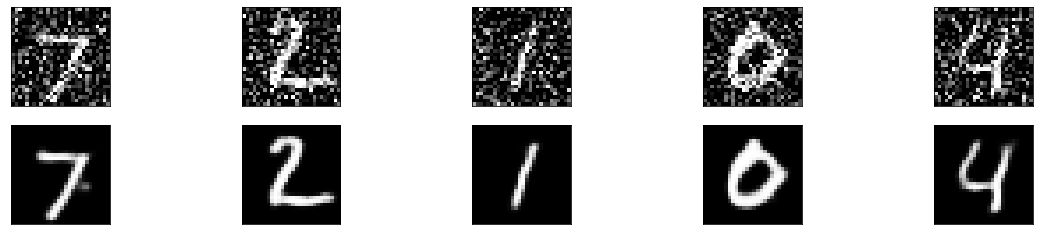

In [ ]:
# prediction on test data
pred = model.predict(x_test_noisy)

plt.figure(figsize=(20, 4))

for i in range(5):
  
    # Display original
    ax = plt.subplot(2, 5, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, 5, i + 1 + 5)
    plt.imshow(pred[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()